**Predicting Student's Academic Performance**

Now the first step of our machine learning development life cycle

*Importing the necessary libraries*

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

 **1. Acquire the Data**

In [ ]:
df = pd.read_csv('StudentData.csv') #we are loading the CSV file and also we are converting the CSV file to the pandas data frame


In [ ]:
df.head() # head tell us about the first five rows of the data frame


,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [ ]:
df.tail() # tail  tell us about the last five rows of the data frame


,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L
479,F,Jordan,Jordan,MiddleSchool,G-08,A,History,S,Father,35,14,23,62,No,Bad,Above-7,L


In [ ]:
df.shape # No. of rows and columns.


(480, 17)

**2. Data Preprocessing & EDA Visualization**

In [ ]:
df.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [ ]:
df.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

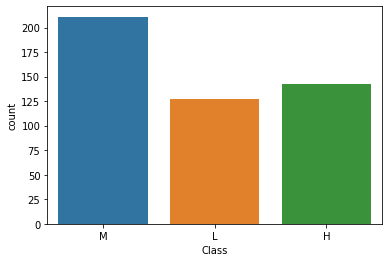

In [ ]:
sns.countplot(x = 'Class' , data = df) # Bar Plot

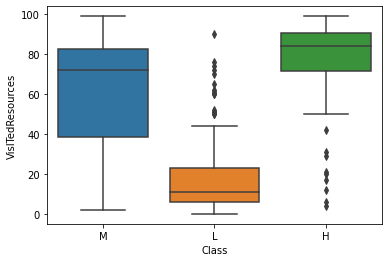

In [ ]:
sns.boxplot(x ='Class', y ='VisITedResources',data=df)

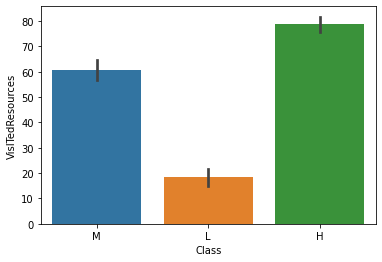

In [ ]:
sns.barplot(x ='Class', y ='VisITedResources',data=df)

In [ ]:
from sklearn.preprocessing import LabelEncoder
cat_to_num = ['gender','StageID','GradeID','SectionID','Topic','Semester','Class']
le = LabelEncoder()
for i in cat_to_num:
  df[i] = le.fit_transform(df[i])


In [ ]:
X = df.drop(['NationalITy','PlaceofBirth','Relation','StudentAbsenceDays','ParentAnsweringSurvey','ParentschoolSatisfaction','Class'],axis=1)
y = df['Class']

In [ ]:
X

,gender,StageID,GradeID,SectionID,Topic,Semester,raisedhands,VisITedResources,AnnouncementsView,Discussion
0,1,2,1,0,7,0,15,16,2,20
1,1,2,1,0,7,0,20,20,3,25
2,1,2,1,0,7,0,10,7,0,30
3,1,2,1,0,7,0,30,25,5,35
4,1,2,1,0,7,0,40,50,12,50
...,...,...,...,...,...,...,...,...,...,...
475,0,1,5,0,2,1,5,4,5,8
476,0,1,5,0,5,0,50,77,14,28
477,0,1,5,0,5,1,55,74,25,29
478,0,1,5,0,6,0,30,17,14,57


In [ ]:
y

0      2
1      2
2      1
3      1
4      2
      ..
475    1
476    2
477    2
478    1
479    1
Name: Class, Length: 480, dtype: int64

**Divide the data into train and test**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=156)

In [ ]:
X_train

,gender,StageID,GradeID,SectionID,Topic,Semester,raisedhands,VisITedResources,AnnouncementsView,Discussion
471,1,1,5,0,6,1,78,82,78,53
412,1,1,4,1,1,0,78,80,66,51
153,1,0,8,1,11,1,10,51,40,40
52,0,0,9,0,3,0,55,90,16,40
287,0,1,3,0,3,1,81,79,91,85
...,...,...,...,...,...,...,...,...,...,...
299,1,2,1,0,10,1,32,14,32,29
63,1,0,7,0,7,0,17,13,16,12
418,1,1,4,1,1,0,88,90,76,81
204,1,1,5,1,0,1,29,10,12,24


In [ ]:
X_test

,gender,StageID,GradeID,SectionID,Topic,Semester,raisedhands,VisITedResources,AnnouncementsView,Discussion
240,1,1,4,1,10,1,72,80,98,96
39,0,1,4,1,10,0,50,90,37,70
285,1,1,3,0,3,1,41,39,35,39
15,0,1,3,0,7,0,30,40,22,66
338,0,2,0,1,4,0,78,98,10,11
...,...,...,...,...,...,...,...,...,...,...
121,1,2,0,2,7,0,0,4,8,30
334,1,2,0,0,4,0,10,8,9,3
406,1,1,4,0,1,0,2,9,10,1
56,1,1,5,1,8,0,19,5,4,1


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

**3. Train the Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
my_model = RandomForestClassifier(n_estimators=50,criterion='entropy',random_state=156)
result = my_model.fit(X_train, y_train)

**4. Test the Model**

In [ ]:
predictions = result.predict(X_test)
predictions

array([0, 2, 2, 2, 2, 0, 0, 1, 2, 0, 2, 0, 0, 0, 2, 2, 1, 0, 0, 1, 1, 2,
       2, 2, 2, 1, 2, 2, 1, 0, 2, 2, 0, 0, 1, 0, 0, 2, 0, 1, 2, 2, 0, 2,
       0, 1, 1, 2, 2, 1, 2, 1, 1, 0, 2, 2, 0, 2, 1, 2, 1, 2, 0, 2, 1, 0,
       1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 2, 2, 0, 0, 0, 1, 2, 2, 2, 2, 1, 2,
       1, 1, 2, 1, 1, 1, 1, 2])

In [ ]:
from sklearn.metrics import accuracy_score,mean_absolute_error,confusion_matrix
accuracy_score(y_test, predictions)


0.7291666666666666

**5. Measuring Performance of Model**

In [ ]:
confusion_mat = confusion_matrix(y_test, predictions)
confusion_df = pd.DataFrame(confusion_mat, index=['Actual 0','Actual 1','Actual 2' ], columns=['Predicted 0','Predicted 1','Predicted 2'])
confusion_df

,Predicted 0,Predicted 1,Predicted 2
Actual 0,19,1,8
Actual 1,1,22,2
Actual 2,7,7,29


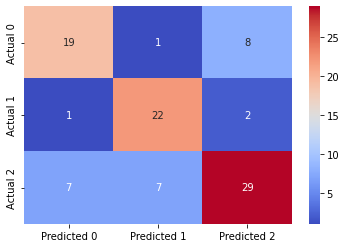

In [ ]:
matrix=sns.heatmap(confusion_df, cmap='coolwarm', annot=True)


**6. Deploy the Model**

In [ ]:
pred_new = result.predict([[0,1,5,0,2,1,5,4,5,8]])
pred_new

array([0])

In [ ]:
pred_new = result.predict([[1,2,1,0,7,0,30,25,5,35]])
pred_new

array([0])